#### *Violent Incidents Per Person Per Acre **(V.I.P.A)*** - Ajay A. Ohm Nathan, Jacob M. Sobotka, Kambin P. Zarei

##### __Introduction__: 
What is one of the main factors that people consider when moving into a neighborhood? The **safety** of the area. For our project, we considered safety in terms of *harm perpetrated by others*. We contemplated incorporating fire incident counts in our final metric, but we ultimately chose to do otherwise because fire incidents include fires started without human involvement. We are only interested in *harm done by others, not by one's environment*. In addition, we specifically chose violent incidents because non-violent incidents like fraud do not necessarily pose an *immediate threat* to a resident's life.

##### __Metric: *Violent Incidents Per Person Per Acre*__
Our metric is a proportion. It is the **number of violent incidents of a neighborhood divided by its total population divided by its area (in acres)**. Note that violent incidents is defined as per *the dictionary of keywords below*. We are using the WPRDC's **police incident blotter, total population, and land use** datasets for our V.I.P.A. metric. 

```python 
VIOLENT_CRIMES_KWORDS = ["AGG", "ASSAULT", "ARSON","RAPE", "KIDNAPPING", "THREAT", "INTIM", "HARRASSMENT", "SEX", 
"ABUSE", "MURDER", "ROBBERY", "EXTORTION"] 
```

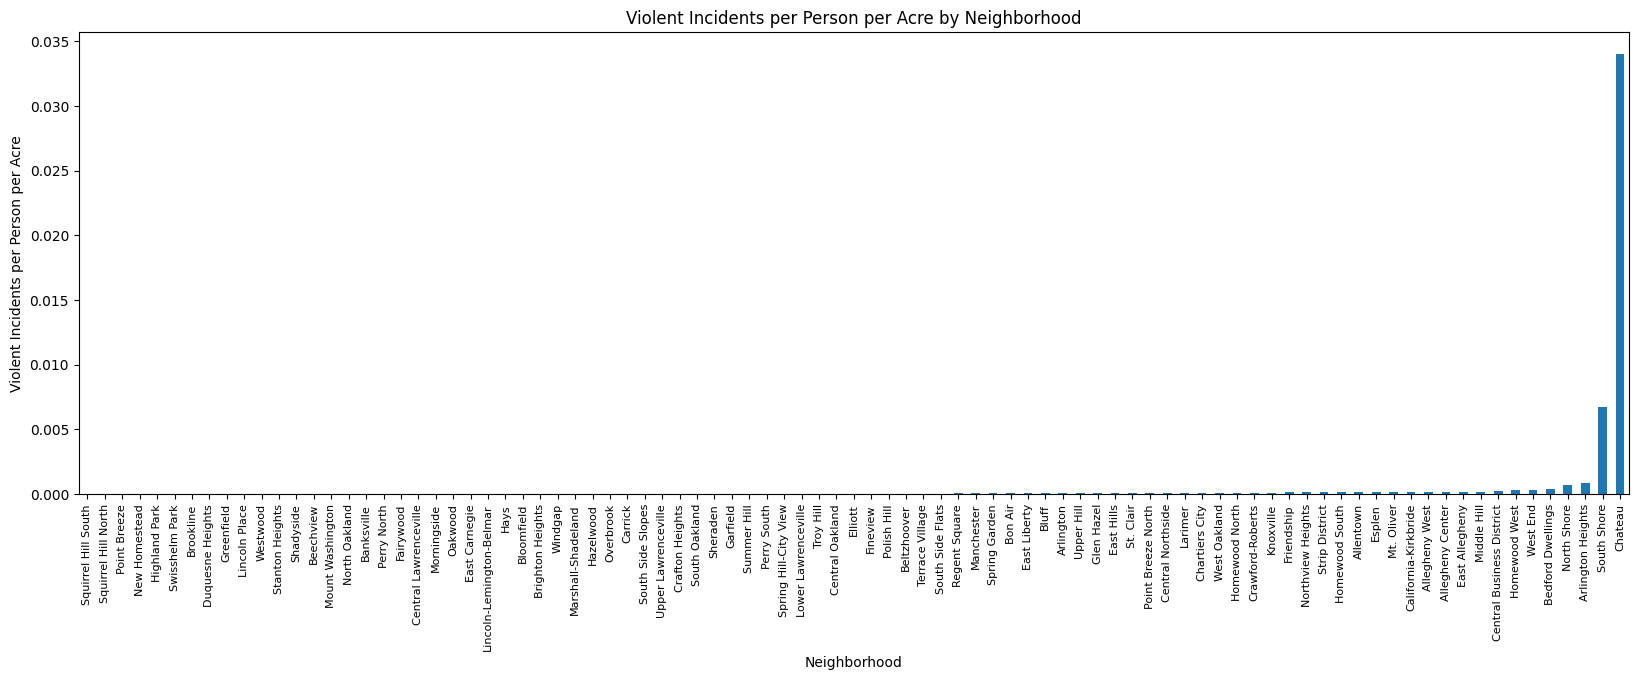

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

land_df = pd.read_csv('LandUsePittNeighborhoods.csv')
v_incidents_df = pd.read_csv("Violent_Incidents.csv")
population_df = pd.read_csv('Population.csv')

# Calculate Violent Incidents Per Person Per Acre for each neighborhood
v_i_p_a = (
    v_incidents_df.pivot_table(index="INCIDENTNEIGHBORHOOD", aggfunc="size") /
    population_df.set_index("Neighborhood")["Estimate; Total"] /
    land_df.set_index("Neighborhood")['Land Area (acres)']
).dropna() # Drop neighborhoods with missing values

# Sort V.I.P.A proportions 
v_i_p_a = v_i_p_a.sort_values(ascending=True)

# Plot V.I.P.A proportions as a bar graph
ax = v_i_p_a.plot.bar(
    figsize=(20, 6),
    legend=False,
    xlabel='Neighborhood',
    ylabel='Violent Incidents per Person per Acre',
    title='Violent Incidents per Person per Acre by Neighborhood',
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
plt.show()


The neighborhoods with the lowest V.I.P.A. proportions are separated by values in the 10^-6 to 10^-5 range. To see whether Squirell Hill South is actually the best neighborhood by our metric, we will display *a table and a second graph with lograthmic scaling*. 

In [2]:
# Create a DataFrame with neighborhood as the index and violent incident counts, 
# population, acres, and V.I.P.A. proportions as variables/columns
v_incidents_data = pd.DataFrame({
    'Violent Incidents': v_incidents_df.groupby('INCIDENTNEIGHBORHOOD').size(),
    'Population': population_df.set_index('Neighborhood')['Estimate; Total'],
    'Acres': land_df.set_index('Neighborhood')['Land Area (acres)'],
    'Violent Incidents per Person per Acre': v_i_p_a
}).dropna() # Drop neighborhoods with missing values 

# Sort the DataFrame by the 'Violent Incidents per Person per Acre' column in ascending order
v_incidents_data = v_incidents_data.sort_values(by='Violent Incidents per Person per Acre')

# Display the DataFrame
print(v_incidents_data)

                     Violent Incidents  Population    Acres  \
Squirrel Hill South               62.0     16042.0  1709.44   
Squirrel Hill North               21.0     11336.0   782.08   
Point Breeze                      13.0      5414.0   642.56   
New Homestead                      2.0       973.0   508.16   
Highland Park                     21.0      6810.0   744.32   
...                                ...         ...      ...   
Bedford Dwellings                 62.0      1349.0   114.56   
North Shore                       29.0       205.0   193.92   
Arlington Heights                 20.0       272.0    84.48   
South Shore                       11.0        12.0   135.68   
Chateau                           25.0         3.0   245.12   

                     Violent Incidents per Person per Acre  
Squirrel Hill South                               0.000002  
Squirrel Hill North                               0.000002  
Point Breeze                                      0.000004  

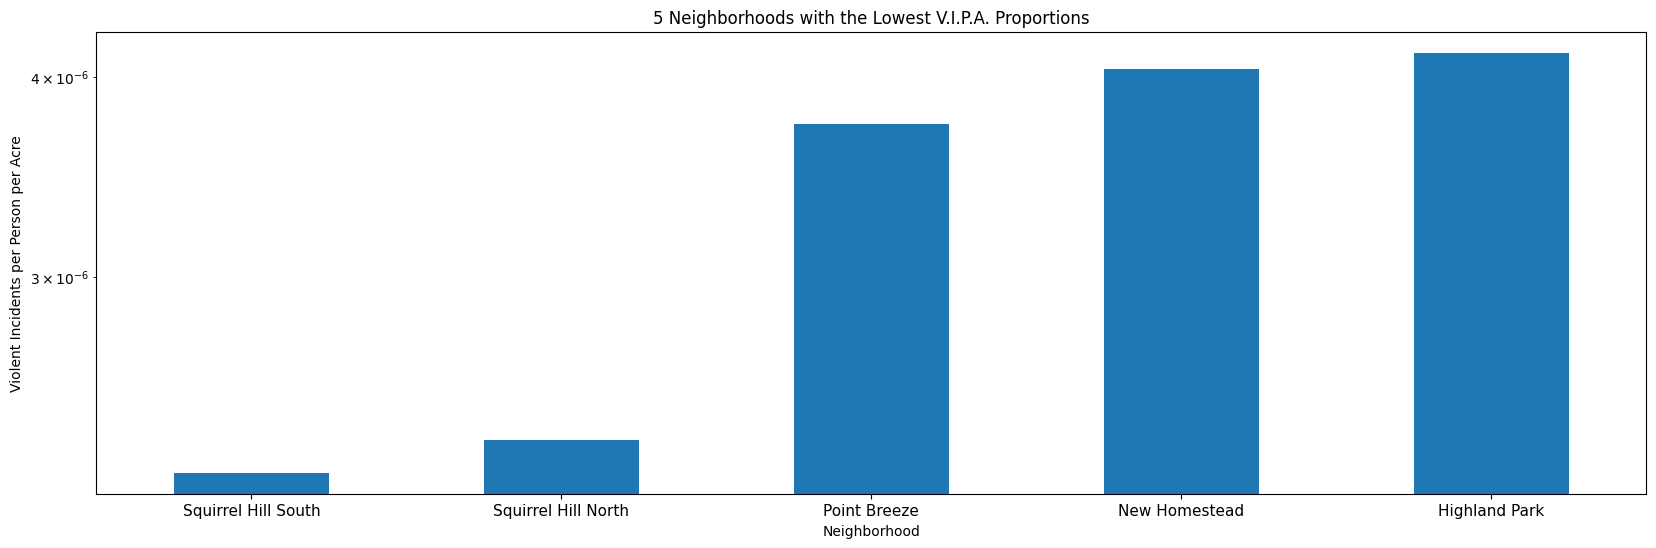

In [8]:
# Look at the first 5 neighborhoods in the dataframe
# (i.e. look at the 5 neighborhoods that have the lowest V.I.P.A.
# proportions)
v_i_p_a = v_i_p_a.head(5)

# Plot a second, more precise, bar graph
ax = v_i_p_a.plot.bar(
    figsize=(20, 6),
    legend=False,
    xlabel='Neighborhood',
    ylabel='Violent Incidents per Person per Acre',
    title='5 Neighborhoods with the Lowest V.I.P.A. Proportions',

    # Logarithmic scaling for y-axis (instead of zooming)
    logy=True,
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=11)
plt.show()

##### *__Closing Remarks__*: 

- **Overall Conclusion**: According to our combined analysis and visualization of multiple standards/metrics of living, we named **"Squirrel Hill South"** as the best neighborhood in all of Pittsburgh. This is because it has the best combination of lowest number of violent incidents, highest population, and highest land area. We found this best combination mathematically by taking the number of violent incidents and divided by population divided by area of the neighborhood.

- **Ajay's Conclusion**: I came to the conclusion of population as my sub-metric. This is because Population is how many total people are in an area. I have always thought of the "more the merrier". With more people comes more services, better standard of living for everyone, more social interactions, more friends, parties, and so on. After all, who would want to live in a lonely neighborhood? That is how I came to the conclusion of population to be by sub-metric. More the population, the better. The lower the population, the worse. 

- **Jake's Conclusion**: Using the land area of neighborhood as my sub-metric, I concluded that Squirrel Hill South was the best neighborhood in Pittsburgh. And after combining our metrics we came to the same conclusion. This makes sense to us because Squirrel Hill South has the lowest population density along with the lowest number of violent crimes, forming a safe and spacious neighborhood for people to live happily. 

- **Kambin's Conclusion**: According to my submetric, New Homestead is the best neighborhood in Pittsburgh due to its low number of violent incidents from January to August 2023. However, our final metric indicates that Squirrel Hill South is the best neighborhood. This illustrates how a neighborhood with a higher number of incidents is not necessarily more dangerous. If said neighborhood is significantly large in population and land area as well, then a given resident is less likely to be a victim of (violent) crime. As for my personal opinion, I cannot pick a best neighborhood because I live in a town outside the city. The only neighborhood that I am familiar with is Oakland, but I am confident that it is not the best neighborhood by most metrics. 
